<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-09-breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `BreastCancer` challenge

**Goal**: it is your job to predict the `diagnosis` for each data item.

**Metric**: submissions are evaluated using the accuracy score.

- When splitting train and test datasets, the test dataset should contain 30% of the data.

**Requirements**: you are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sklearn` Python libraries.

1. You can import any model from `sk-learn`.
2. Try `sk-learn` [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
3. Explore AutoML with `FLAML`

# Setup

In [21]:
# Import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import random
import os

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/teaching-handsondatapipelines/main/materials/datasets/breastcancer.csv")

# Data understanding

Hints

- There are 569 observations with 30 features each
- Each observation is labelled with a `diagnosis`

Take a first glance to the dataset

- Do we consider all features?
- Are there null values?
- Which are the attribute types?
- Which are the attribute ranges?
- How many labels?
- Are classes unbalanced?



# Check the data

In [29]:
print(f'Dataset shape: {df.shape}')
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())
label_counts = df['diagnosis'].value_counts()
print(f'Label counts:{label_counts}')

Dataset shape: (569, 33)
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimens

# Data profiling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Feature semantics

Hint:

- id of the observation
- diagnosis (M = malignant, B = benign)
- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

`*_mean`: the means of all cells

`*_se`: standard error of all cells

`*_worst`: the worst cell


In [31]:
#step1 Data preprocessing
#Drop unnecessary columns(ID)
df.drop(columns=['id'], errors= 'ignore', inplace=True)
df.drop(columns=['Unnamed: 32'], errors= 'ignore', inplace=True)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
#step2 splitting data into features and labels
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#step3 Building scikit-learn pieplines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Train the KNeighbors pipeline
knn_pipeline.fit(X_train, y_train)

# Make predictions with KNeighbors
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate the KNeighbors model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of KNeighborsClassifier Pipeline: {knn_accuracy:.2f}')


Random Forest Accuracy: 0.97
Accuracy of KNeighborsClassifier Pipeline: 0.96


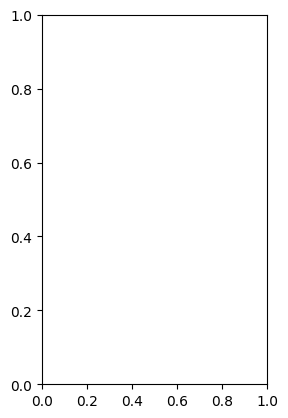

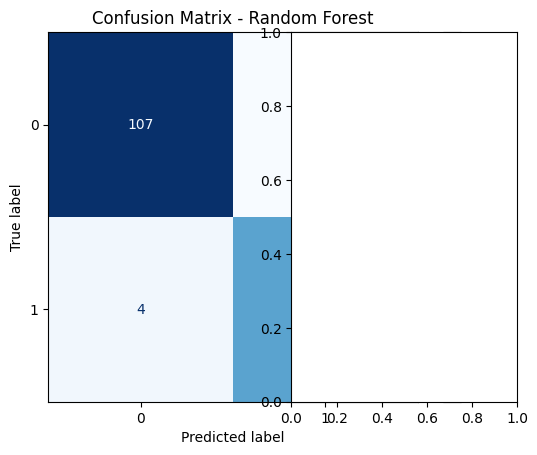

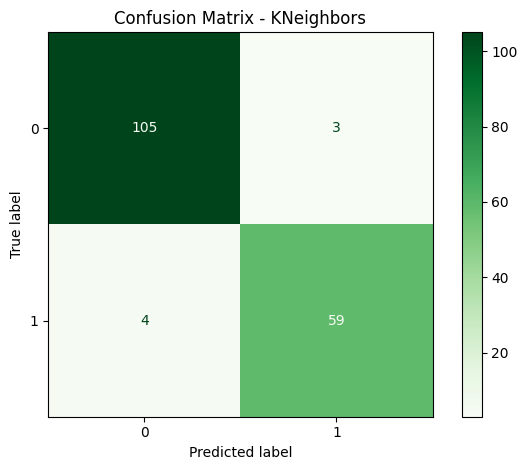

In [54]:
# Step 9: Visualizing the outcome of Random Forest and KNN
# Plotting the confusion matrix for Random Forest
from sklearn.metrics import ConfusionMatrixDisplay

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')

# Plotting the confusion matrix for KNeighbors
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, cmap='Greens')
plt.title('Confusion Matrix - KNeighbors')

plt.tight_layout()
plt.show()

In [50]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
reg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LinearRegression())
])
reg_pipeline.fit(X_train, y_train)
y_pred_reg = reg_pipeline.predict(X_test)
reg_r2 = r2_score(y_test, y_pred_reg)
reg_mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error of Linear Regression Pipeline: {reg_mse:.2f}')
print(f'R^2 Score of Linear Regression Pipeline: {reg_r2:.2f}')

Mean Squared Error of Linear Regression Pipeline: 0.07
R^2 Score of Linear Regression Pipeline: 0.71


In [45]:
#step4 AutoML
!pip install flaml
from flaml import AutoML
automl = AutoML()
automl_settings = {
    'time_budget': 60,  # time budget in seconds
    'metric': 'accuracy',
    'task': 'classification'
}

# Run AutoML on the training data
automl.fit(X_train, y_train, **automl_settings)

# Make predictions using the best model
y_pred_automl = automl.predict(X_test)

# Evaluate the AutoML model
automl_accuracy = accuracy_score(y_test, y_pred_automl)
print(f'Accuracy of FLAML AutoML Model: {automl_accuracy:.2f}')
print(f'Best model: {automl.model}')

[flaml.automl.logger: 11-27 13:16:03] {1728} INFO - task = classification
[flaml.automl.logger: 11-27 13:16:03] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 11-27 13:16:03] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 11-27 13:16:03] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 11-27 13:16:03] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-27 13:16:03] {2393} INFO - Estimated sufficient time budget=5240s. Estimated necessary time budget=121s.
[flaml.automl.logger: 11-27 13:16:03] {2442} INFO -  at 0.8s,	estimator lgbm's best error=0.0904,	best estimator lgbm's best error=0.0904
[flaml.automl.logger: 11-27 13:16:03] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-27 13:16:04] {2442} INFO -  at 1.0s,	estimator lgbm's best error=0.0904,	best estimator lgbm's best error=0.0904
[flaml.automl.logger: 11-2

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-27 13:16:04] {2442} INFO -  at 1.8s,	estimator sgd's best error=0.3744,	best estimator lgbm's best error=0.0577
[flaml.automl.logger: 11-27 13:16:04] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 11-27 13:16:05] {2442} INFO -  at 2.0s,	estimator lgbm's best error=0.0426,	best estimator lgbm's best error=0.0426
[flaml.automl.logger: 11-27 13:16:05] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 11-27 13:16:05] {2442} INFO -  at 2.3s,	estimator lgbm's best error=0.0426,	best estimator lgbm's best error=0.0426
[flaml.automl.logger: 11-27 13:16:05] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 11-27 13:16:05] {2442} INFO -  at 2.5s,	estimator lgbm's best error=0.0426,	best estimator lgbm's best error=0.0426
[flaml.automl.logger: 11-27 13:16:05] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 11-27 13:16:05] {2442} INFO -  at 2.9s,	estimator lgbm's best error=0.0426,	best es

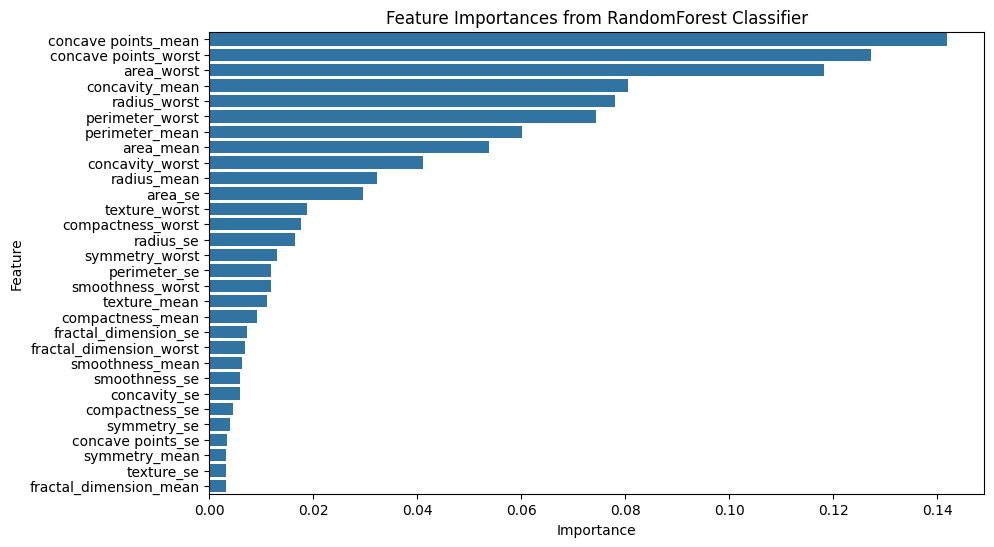

In [46]:
#step5 Visualizing feature importance
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

# Create a feature importance dataframe
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances from RandomForest Classifier')
plt.show()